In [88]:
import numpy as np

In [89]:
energy_consumption = np.array([1200,3400,2900,1800,2500])
print(f"the energy consumption (in MW): {energy_consumption}")

the energy consumption (in MW): [1200 3400 2900 1800 2500]


In [90]:
total = np.sum(energy_consumption)
print(f"Total energy consumption is: {total} MWh")

Total energy consumption is: 11800 MWh


In [91]:
mean_energy = np.mean(energy_consumption)
print(f"Mean energy consumption is: {mean_energy} MWh")

Mean energy consumption is: 2360.0 MWh


In [92]:
average_energy = np.average(energy_consumption)
print(f"Average energy consumption is: {average_energy:.2f} MWh")

Average energy consumption is: 2360.00 MWh


In [93]:
std_energy = np.std(energy_consumption)
print(f"Standard deviation of energy consumption is: {std_energy:.2f} MWh")

Standard deviation of energy consumption is: 781.28 MWh


In [94]:
reshape_columns = energy_consumption.reshape(5,1)
print(f"the reshaped array: \n{reshape_columns}")

the reshaped array: 
[[1200]
 [3400]
 [2900]
 [1800]
 [2500]]


In [95]:
import pandas as pd
data = {
    "Energy Source": ["Solar", "Wind", "Hydropower", "Geothermal", "Biomass", "Nuclear"],
    "Energy Consumption (MWh)": [1200, np.nan, 2900, np.nan, 2500, 3200],
    "Cost (Million $)": [200, 400, np.nan, 150,250,np.nan]
}

In [96]:
df = pd.DataFrame(data)
df.head()

,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
1,Wind,NaN,400.0
2,Hydropower,2900.0,NaN
3,Geothermal,NaN,150.0
4,Biomass,2500.0,250.0


In [97]:
df.isnull().sum()

,0
Energy Source,0
Energy Consumption (MWh),2
Cost (Million $),2


In [98]:
#handling missing value with dropping them
droping = df.dropna()
droping

,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
4,Biomass,2500.0,250.0


In [99]:
#handling missing values with mean
df["Energy Consumption (MWh)"] = df["Energy Consumption (MWh)"].fillna(df["Energy Consumption (MWh)"].mean())
df['Cost (Million $)'] = df['Cost (Million $)'].fillna(df['Cost (Million $)'].mean())
df

,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
1,Wind,2450.0,400.0
2,Hydropower,2900.0,250.0
3,Geothermal,2450.0,150.0
4,Biomass,2500.0,250.0
5,Nuclear,3200.0,250.0


In [100]:
df["Cost per MWh ($)"] = (df["Energy Consumption (MWh)"] / df["Cost (Million $)"] )
df

,Energy Source,Energy Consumption (MWh),Cost (Million $),Cost per MWh ($)
0,Solar,1200.0,200.0,6.000000
1,Wind,2450.0,400.0,6.125000
2,Hydropower,2900.0,250.0,11.600000
3,Geothermal,2450.0,150.0,16.333333
4,Biomass,2500.0,250.0,10.000000
5,Nuclear,3200.0,250.0,12.800000


In [101]:
#data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Energy Consumption (MWh)","Cost (Million $)"]] = scaler.fit_transform(df[["Energy Consumption (MWh)","Cost (Million $)"]])
df

,Energy Source,Energy Consumption (MWh),Cost (Million $),Cost per MWh ($)
0,Solar,0.000,0.2,6.000000
1,Wind,0.625,1.0,6.125000
2,Hydropower,0.850,0.4,11.600000
3,Geothermal,0.625,0.0,16.333333
4,Biomass,0.650,0.4,10.000000
5,Nuclear,1.000,0.4,12.800000


In [102]:
#standardization -z score method - standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["Energy Consumption (MWh)","Cost (Million $)"]] = scaler.fit_transform(df[["Energy Consumption (MWh)","Cost (Million $)"]])
df

,Energy Source,Energy Consumption (MWh),Cost (Million $),Cost per MWh ($)
0,Solar,-2.005893e+00,-6.546537e-01,6.000000
1,Wind,3.563181e-16,1.963961e+00,6.125000
2,Hydropower,7.221213e-01,1.817029e-16,11.600000
3,Geothermal,3.563181e-16,-1.309307e+00,16.333333
4,Biomass,8.023570e-02,1.817029e-16,10.000000
5,Nuclear,1.203536e+00,1.817029e-16,12.800000


In [103]:
#OHE
# from pandas import get_dummies
encode = pd.get_dummies(df, columns=["Energy Source"], dtype=int)
encode

,Energy Consumption (MWh),Cost (Million $),Cost per MWh ($),Energy Source_Biomass,Energy Source_Geothermal,Energy Source_Hydropower,Energy Source_Nuclear,Energy Source_Solar,Energy Source_Wind
0,-2.005893e+00,-6.546537e-01,6.000000,0,0,0,0,1,0
1,3.563181e-16,1.963961e+00,6.125000,0,0,0,0,0,1
2,7.221213e-01,1.817029e-16,11.600000,0,0,1,0,0,0
3,3.563181e-16,-1.309307e+00,16.333333,0,1,0,0,0,0
4,8.023570e-02,1.817029e-16,10.000000,1,0,0,0,0,0
5,1.203536e+00,1.817029e-16,12.800000,0,0,0,1,0,0


In [104]:
#line plot
months = ['jan','feb','mar','apr','may','jun']
energy_cons = [1200,1300,1100,1500,1400,1600]

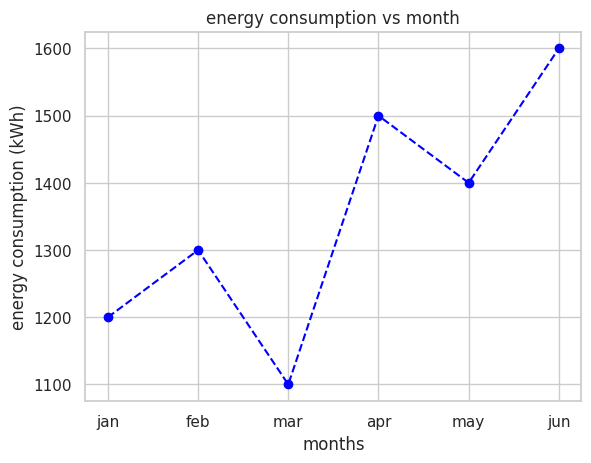

In [105]:
import matplotlib.pyplot as plt

plt.plot(months,energy_cons,marker='o',linestyle='dashed',color='blue')
plt.title('energy consumption vs month')
plt.xlabel('months')
plt.ylabel('energy consumption (kWh)')
plt.show()

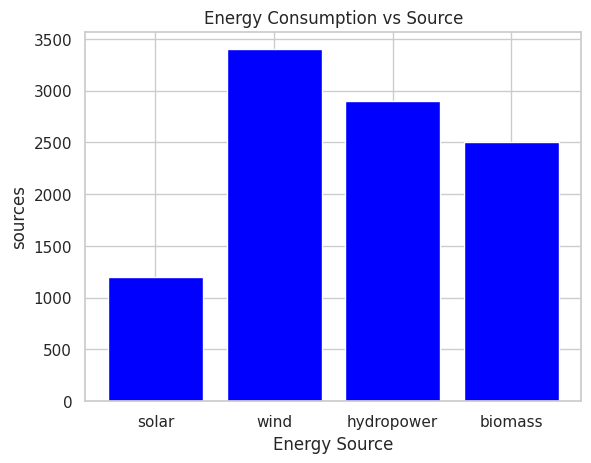

In [106]:
#bar plot'
energy_sources = ['solar','wind','hydropower','biomass']
values = [1200,3400,2900,2500]

plt.bar(energy_sources,values,color='blue')
plt.title('Energy Consumption vs Source')
plt.xlabel('Energy Source')
plt.ylabel('sources')
plt.show()

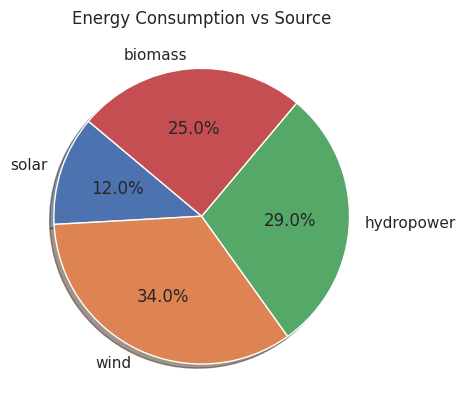

In [107]:
#pie chart
plt.pie(values,labels=energy_sources,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title('Energy Consumption vs Source')
plt.show()

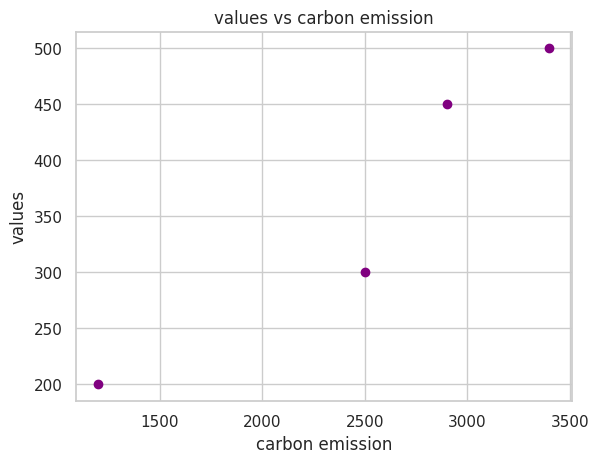

In [108]:
#scatter plot
carbon_emission = [200,500,450,300]
plt.scatter(values,carbon_emission,color='purple')
plt.title('values vs carbon emission')
plt.xlabel('carbon emission')
plt.ylabel('values')
plt.show()

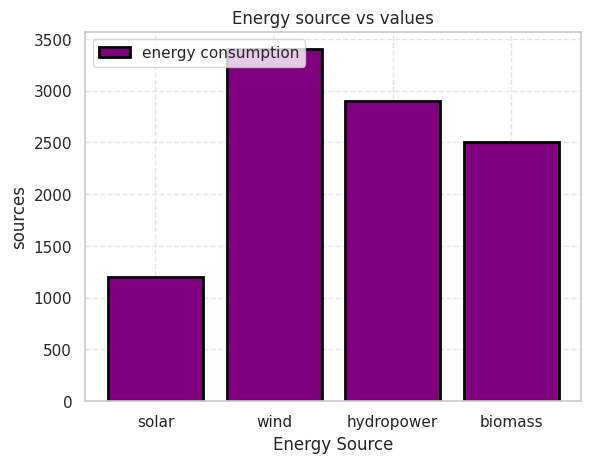

In [109]:
plt.bar(energy_sources,values,color='purple',edgecolor='black',linewidth=2)
plt.title('Energy source vs values')
plt.xlabel('Energy Source')
plt.ylabel('sources')
plt.grid(True,linestyle='--',alpha=0.5)
plt.legend(['energy consumption'], loc ='upper left')
plt.show()

In [110]:
import seaborn as sns

In [111]:
data = {
    "solar":[1200,1500,1300],
    "wind":[3400,3600,3200],
    "hydropower":[2900,3100,2800],
    "biomass":[2500,2700,2400]
}
df = pd.DataFrame(data)
df

,solar,wind,hydropower,biomass
0,1200,3400,2900,2500
1,1500,3600,3100,2700
2,1300,3200,2800,2400


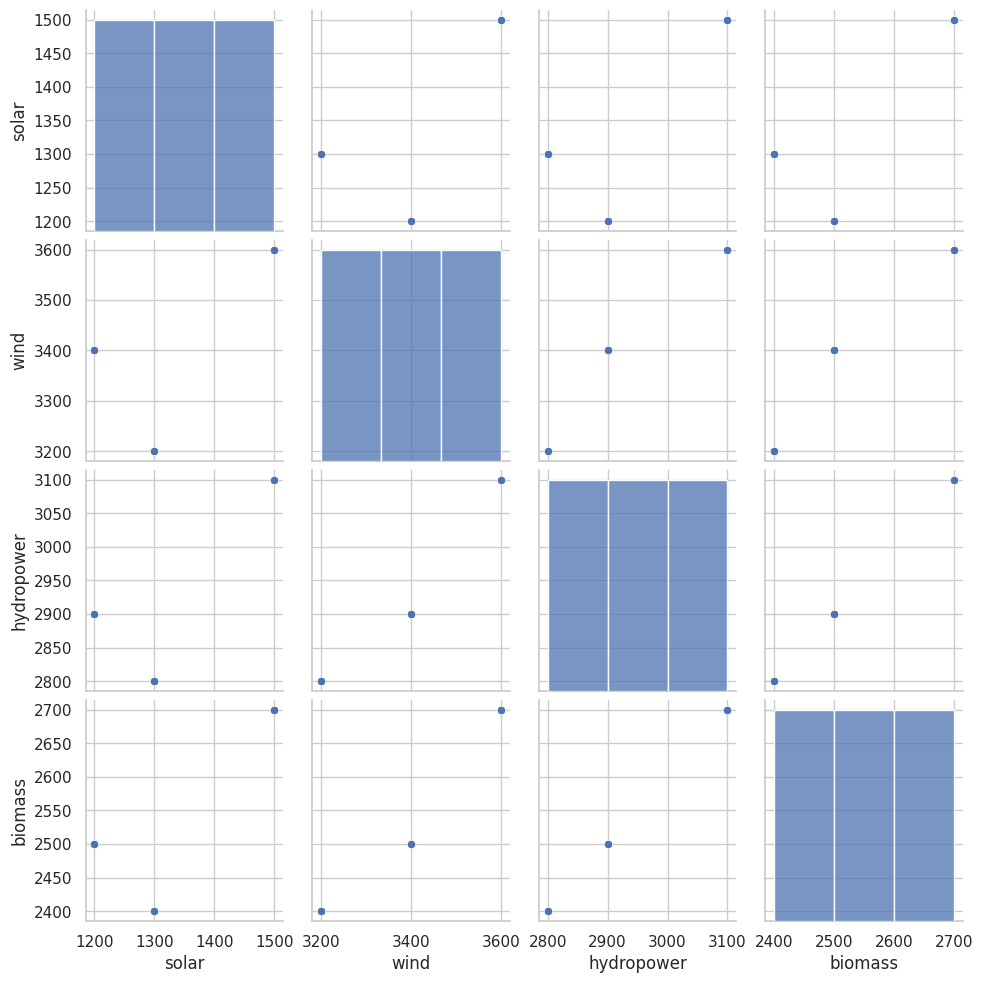

In [112]:
sns.pairplot(df)
plt.show()

In [113]:
c_m = df.corr()
c_m

,solar,wind,hydropower,biomass
solar,1.000000,0.654654,0.785714,0.785714
wind,0.654654,1.000000,0.981981,0.981981
hydropower,0.785714,0.981981,1.000000,1.000000
biomass,0.785714,0.981981,1.000000,1.000000


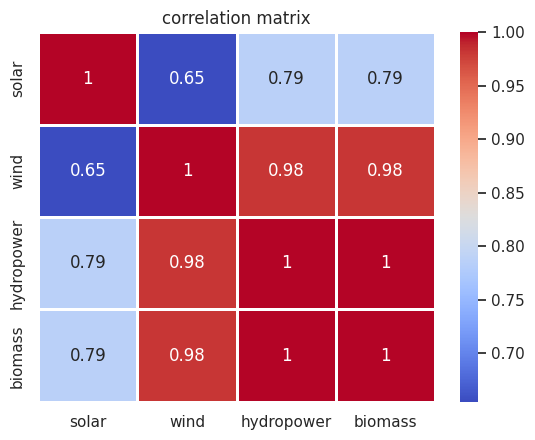

In [114]:
sns.heatmap(c_m,annot=True,cmap='coolwarm',linewidths=2)
plt.title('correlation matrix')
plt.show()

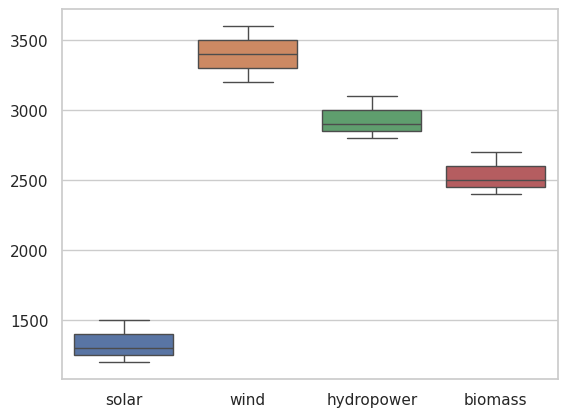

In [115]:
sns.boxplot(data = df)
plt.show()

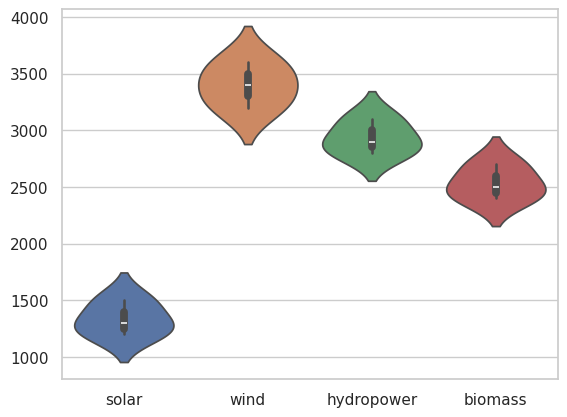

In [116]:
#voilin plot
sns.violinplot(data=df)
plt.show()

In [117]:
#regression plots
energy_values = [100,200,300,400,500]
carbon_emission = [10,20,30,40,50]
df_reg = pd.DataFrame({'energy values':energy_values,'carbon emission':carbon_emission})
df_reg

,energy values,carbon emission
0,100,10
1,200,20
2,300,30
3,400,40
4,500,50


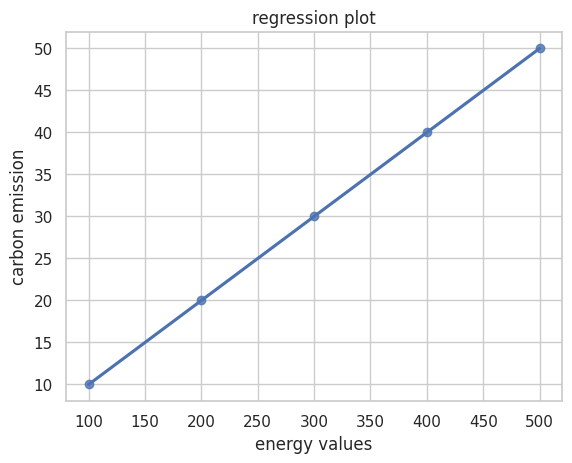

In [118]:
sns.regplot(data=df_reg,x='energy values',y='carbon emission')
plt.title('regression plot')
plt.show()